<a href="https://colab.research.google.com/github/YueunKim/Kriss_colab/blob/master/4_Modules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#4, p.5
import torch
import torch.nn.functional as F

x = torch.tensor([[0.8008, -0.2586, 0.5019, -0.2002, -0.7416],
                  [0.0557, 0.6046, 0.0864, -0.5929, 1.2606]])
print(x)

y = F.relu(x)
print(y)

tensor([[ 0.8008, -0.2586,  0.5019, -0.2002, -0.7416],
        [ 0.0557,  0.6046,  0.0864, -0.5929,  1.2606]])
tensor([[0.8008, 0.0000, 0.5019, 0.0000, 0.0000],
        [0.0557, 0.6046, 0.0864, 0.0000, 1.2606]])


In [2]:
#4, p.6
import torch.nn as nn

f = nn.Linear(in_features = 10, out_features = 4)

for n, p in f.named_parameters():
    print(n, p.size(), p)

x = torch.empty(523, 10).normal_()
y = f(x)
y.size()

weight torch.Size([4, 10]) Parameter containing:
tensor([[-3.0796e-01,  1.9768e-01,  1.5204e-01,  6.6153e-02, -1.1333e-01,
          4.4732e-02, -2.0469e-01,  1.2794e-01, -2.2968e-01,  2.8051e-01],
        [-2.5736e-01,  3.7788e-02,  1.4287e-01, -2.6320e-02, -1.8337e-01,
         -1.7184e-01, -1.0434e-01, -2.4970e-01,  1.6474e-01,  4.4521e-02],
        [ 2.8992e-01, -6.7197e-02,  1.5405e-01, -3.0987e-01,  3.0921e-01,
         -1.9533e-03, -5.2338e-02,  2.3184e-05,  2.2182e-01,  8.6858e-02],
        [-2.5390e-01, -1.9030e-01,  2.5247e-02, -8.5570e-02, -2.2343e-02,
          1.6123e-01,  1.5535e-01, -2.0208e-01, -2.9071e-01,  1.4992e-01]],
       requires_grad=True)
bias torch.Size([4]) Parameter containing:
tensor([ 0.1345,  0.0610, -0.2418,  0.2651], requires_grad=True)


torch.Size([523, 4])

In [3]:
#4. p.7
f = torch.nn.MSELoss()
x = torch.tensor([3., 0.]).requires_grad_()
y = torch.tensor([0., 0.]).requires_grad_()
l1 = f(x, y)
print('MSELoss1: {}', l1)

x = torch.tensor([2.])
y = torch.tensor([0.])
l2 = f(x, y)
print('MSELoss2: {}', l2)

x = torch.tensor([3., 0., 0., 0.])
y = torch.tensor([0., 0., 0., 0.,])
l3 = f(x, y)
print('MSELoss3: {}', l3)

MSELoss1: {} tensor(4.5000, grad_fn=<MseLossBackward>)
MSELoss2: {} tensor(4.)
MSELoss3: {} tensor(2.2500)


In [4]:
#4, p.10
import torch
import time
def timing(x, w, batch = False, nb = 101):
    t = torch.zeros(nb)
    
    for u in range(0, t.size(0)):
        t0 = time.perf_counter()
        if batch:
            y = x.mm(w.t())
        else:
            y = torch.empty(x.size(0), w.size(0))
            for k in range(y.size(0)):
                y[k] = w.mv(x[k])
        y.is_cuda and torch.cuda.synchronize()
        t[u] = time.perf_counter() - t0
    
    return t.median().item()

x = torch.empty(2500, 1000).normal_()
w = torch.empty(1500, 1000).normal_()
print('Batch-processing speed-up on CPU %.1f' % 
      (timing(x, w, batch = False)/timing(x, w, batch = True)))

x = x.to('cuda')
w = w.to('cuda')
print('Batch-processing speed-up on GPU %.1f' % 
      (timing(x, w, batch = False)/timing(x, w, batch = True)))



Batch-processing speed-up on CPU 6.2
Batch-processing speed-up on GPU 74.7


In [5]:
#4, p.12
def linear(input, weight, bias=None):
    if input.dim() == 2 and bias is not None:
        #fused op is marginally faster
        return torch.addmm(bias, input, weight.t())
    
    output = input.matmul(weight.t())
    if bias is not None:
        output += bias
    return output


In [6]:
#4, p.44
#calcucate output dimension in general convolution operations
import torch.nn.functional as F

weight = torch.empty(5, 4, 2, 3).normal_()
bias = torch.empty(5).normal_()
input = torch.empty(117, 4, 10, 3).normal_()
output = F.conv2d(input, weight, bias)
output.size()

torch.Size([117, 5, 9, 1])

In [7]:
#4, p.83
#calculate difference of convolution operation between inputmap and outputmap when dilation is over 1
import torch.nn as nn

x = torch.empty(1, 1, 20, 30).normal_()
l = nn.Conv2d(1, 1, kernel_size=3, dilation=4)
l(x).size()

torch.Size([1, 1, 12, 22])

Mounted at /content/gdrive


Extracting /content/gdrive/My Drive/withCoLab/dataset/mnist/MNIST/raw/train-images-idx3-ubyte.gz to /content/gdrive/My Drive/withCoLab/dataset/mnist/MNIST/raw


Extracting /content/gdrive/My Drive/withCoLab/dataset/mnist/MNIST/raw/train-labels-idx1-ubyte.gz to /content/gdrive/My Drive/withCoLab/dataset/mnist/MNIST/raw


Extracting /content/gdrive/My Drive/withCoLab/dataset/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/gdrive/My Drive/withCoLab/dataset/mnist/MNIST/raw




Extracting /content/gdrive/My Drive/withCoLab/dataset/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/gdrive/My Drive/withCoLab/dataset/mnist/MNIST/raw
Processing...


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


torch.Size([1, 5, 26, 26])

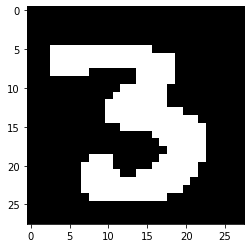

In [8]:
#4, p.85
# convolution with various filter
import torch
import torchvision
from torchvision.utils import save_image
from PIL import Image
from matplotlib.pyplot import imshow
import numpy as np
from google.colab import drive
import torch.nn.functional as F
from torchvision.datasets import MNIST

drive.mount('/content/gdrive')
mnist_dataset = MNIST('/content/gdrive/My Drive/withCoLab/dataset/mnist/', train=True, download = True)
#mnist_dataset = MNIST(download_root, transform=mnist_transform, train=True, download=True)

x = mnist_dataset.data[12].float().view(1, 1, 28, 28)
save_image(x, 'inputx.png')
img = Image.open('inputx.png')
imshow(np.asarray(img))

weight = torch.empty(5, 1, 3, 3)
weight[0, 0] = torch.tensor([ [ 0., 0., 0. ],
[ 0., 1., 0. ],
[ 0., 0., 0. ] ])

weight[1, 0] = torch.tensor([ [ 1., 1., 1. ],
[ 1., 1., 1. ],
[ 1., 1., 1. ] ])
weight[2, 0] = torch.tensor([ [ -1., 0., 1. ],
[ -1., 0., 1. ],
[ -1., 0., 1. ] ])
weight[3, 0] = torch.tensor([ [ -1., -1., -1. ],
[ 0., 0., 0. ],
[ 1., 1., 1. ] ])
weight[4, 0] = torch.tensor([ [ 0., -1., 0. ],
[ -1., 4., -1. ],
[ 0., -1., 0. ] ])

y = F.conv2d(x, weight)
y.size()

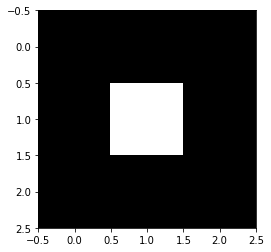

In [9]:
save_image(weight[0,0], 'weight0.png')
w0img = Image.open('weight0.png')
imshow(np.asarray(w0img))

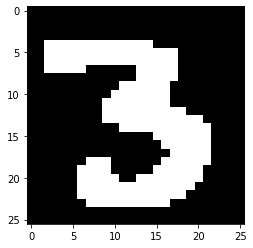

In [10]:
save_image(y[0,0,:,:], 'y0.png')
y0img = Image.open('y0.png')
imshow(np.asarray(y0img))

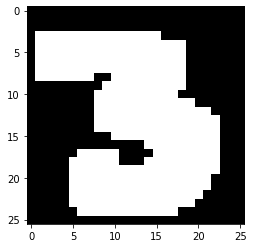

In [11]:
save_image(y[0,1,:,:], 'y1.png')
y1img = Image.open('y1.png')
imshow(np.asarray(y1img))

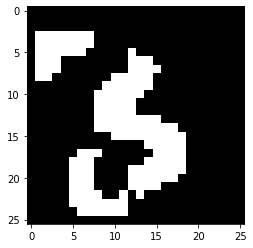

In [12]:
save_image(y[0,2,:,:], 'y2.png')
y2img = Image.open('y2.png')
imshow(np.asarray(y2img))

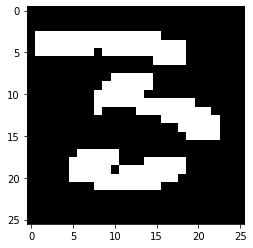

In [13]:
save_image(y[0,3,:,:], 'y3.png')
y3img = Image.open('y3.png')
imshow(np.asarray(y3img))

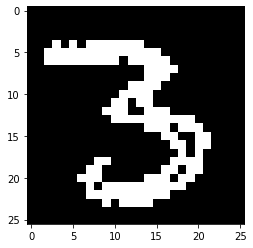

In [14]:
save_image(y[0,4,:,:], 'y4.png')
y4img = Image.open('y4.png')
imshow(np.asarray(y4img))

In [15]:
import torch.nn as nn
f = nn.Conv2d(in_channels=4, out_channels=5, kernel_size=3)
for n, p in f.named_parameters():
    print(n, p.size())

weight torch.Size([5, 4, 3, 3])
bias torch.Size([5])


In [16]:
x = torch.empty(117, 4, 10, 3).normal_()
y = f(x)
y.size()

torch.Size([117, 5, 8, 1])

In [17]:
x = torch.empty(1, 1, 20, 30).normal_()
l = nn.Conv2d(1, 1, kernel_size=3, dilation=4)
l(x).size()

torch.Size([1, 1, 12, 22])

In [18]:
#from torchvision.datasets import MNIST

#mnist = MNIST('./data/mnist/', train=True, download=True)
d = mnist_dataset.data
d.size()

torch.Size([60000, 28, 28])

In [19]:
x = d.view(d.size(0), 1, d.size(1), d.size(2))
x.size()

torch.Size([60000, 1, 28, 28])

In [20]:
x = x.view(x.size(0), -1)
x.size()

torch.Size([60000, 784])

In [21]:
#4, p.99
#create module~
import torch 
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5)
        self.fc1 = nn.Linear(256, 200)
        self.fc2 = nn.Linear(200, 10)
        
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), kernel_size=3, stride=3))
        x = F.relu(F.max_pool2d(self.conv2(x), kernel_size=2, stride=2))
        x = x.view(-1, 256)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [22]:
model = Net()
input = torch.empty(12, 1, 28, 28).normal_()
output = model(input)
print(output.size())

torch.Size([12, 10])


In [23]:
for k in model.parameters():
    print(k.size())

torch.Size([32, 1, 5, 5])
torch.Size([32])
torch.Size([64, 32, 5, 5])
torch.Size([64])
torch.Size([200, 256])
torch.Size([200])
torch.Size([10, 200])
torch.Size([10])


In [24]:
#4, p.102
# parameter~
from torch.nn.parameter import Parameter

class Buggy(nn.Module):
  def __init__(self):
    super(Buggy, self).__init__()
    self.conv = nn.Conv2d(1, 32, kernel_size=5)
    self.param = Parameter(torch.zeros(123, 456))
    self.other_stuff = [nn.Linear(543, 21)]


model = Buggy()

for k in model.parameters():
  print(k.size())

torch.Size([123, 456])
torch.Size([32, 1, 5, 5])
torch.Size([32])


In [25]:
#4, p.103
# parameter ~
class AnotherNotBuggy(nn.Module):
  def __init__(self):
    super(AnotherNotBuggy, self).__init__()
    self.conv = nn.Conv2d(1, 32, kernel_size=5)
    self.param = Parameter(torch.zeros(123, 456))
    self.other_stuff = nn.ModuleList()
    self.other_stuff.append(nn.Linear(543, 21))

model = AnotherNotBuggy()

for k in model.parameters():
  print(k.size())

torch.Size([123, 456])
torch.Size([32, 1, 5, 5])
torch.Size([32])
torch.Size([21, 543])
torch.Size([21])


In [26]:
 import torch
 from torch import nn
 input = torch.randn(1, 64, 10, 9)
 m = nn.AdaptiveAvgPool2d((7, 7))
 output = m(input)
 output.size()

torch.Size([1, 64, 7, 7])